In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
dir_path='../control_transition'
sys.path.append(dir_path)

In [3]:
from plot_utils import *

In [ ]:
why not the same at p=0??

In [5]:
L=10
params_list=[
({'nu':0,'de':1,},
{
'p_ctrl':np.linspace(0,1,11),
'p_proj':[0,],
'sC':np.arange(0,1),
'sm':np.arange(2000),
'L':[L]
}
),
]

In [6]:
for fixed_params,vary_params in params_list:
    data_MPS_0_T_dict=generate_params(
        fixed_params=fixed_params,
        vary_params=vary_params,
        fn_template='MPS_({nu},{de})_L{L}_pctrl{p_ctrl:.3f}_pproj{p_proj:.3f}_sC{sC}_sm{sm}_x01_shots_bitstring_T.json',
        fn_dir_template='./',
        input_params_template='',
        load_data=load_zip_json,
        filename=None,
        filelist=None,
        load=True,
        data_dict={'fn':set()},
        zip_fn=f'./MPS_0-1_shots_bitstring_T_L{L}.zip'
    )
df_MPS_0_T=convert_pd(data_MPS_0_T_dict,names=['Metrics','sm','sC','p_ctrl','L','p_proj'])

generate_params: 100%|██████████| 22000/22000 [00:01<00:00, 18170.58it/s]


In [7]:
df_MPS_0_T

observations
Metrics sm   sC p_ctrl L  p_proj                                                   
O       0    0  0.0    10 0.0     [1, 513, 256, 769, 513, 481, 352, 888, 381, 48...
        1    0  0.0    10 0.0     [1, 513, 257, 0, 321, 288, 417, 496, 441, 312,...
        2    0  0.0    10 0.0     [1, 0, 256, 385, 449, 32, 672, 481, 636, 416, ...
        3    0  0.0    10 0.0     [1, 0, 256, 385, 449, 385, 272, 960, 196, 308,...
        4    0  0.0    10 0.0     [1, 0, 257, 128, 449, 961, 1008, 425, 977, 964...
...                                                                             ...
        1995 0  1.0    10 0.0     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
        1996 0  1.0    10 0.0     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
        1997 0  1.0    10 0.0     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
        1998 0  1.0    10 0.0     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
        1999 0  1.0    10 0.0     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

[21000 rows x 1 columns]

In [8]:
L=10
sC=0
p_ctrl=0
shots = np.vstack(df_MPS_0_T['observations'].xs('O',level='Metrics').xs(L,level='L').xs(sC,level='sC').xs(p_ctrl,level='p_ctrl'))

In [12]:
def XEB_calc(p,L):
    return 2**L * (np.sum(p**2))-1


In [13]:
def XEB_single(shots,idx):
    # idx=2
    unq_vals, unq_counts = np.unique(shots[:,idx],return_counts=True)
    p=unq_counts/shots[:,idx].shape[0]
    return XEB_calc(p,L)
    # return p

In [14]:
def XEB(L,sC,p_ctrl):
    try:
        shots = np.vstack(df_MPS_0_T['observations'].xs('O',level='Metrics').xs(L,level='L').xs(sC,level='sC').xs(p_ctrl,level='p_ctrl'))
        return [(XEB_single(shots,t_idx)) for t_idx in range(shots.shape[1])]
    except KeyError:
        print(f'KeyError: L={L},sC={sC},p_ctrl={p_ctrl}')
    

In [15]:
XEB(L=10,sC=0,p_ctrl=0)

[1023.0,
 310.3344,
 249.070528,
 114.828224,
 78.44038400000001,
 55.201215999999995,
 34.57376,
 14.380991999999999,
 8.407488,
 4.57056,
 4.217280000000001,
 4.76512,
 4.498368,
 3.420096,
 3.529152,
 4.532672,
 3.0785920000000004,
 2.8430719999999994,
 3.1113600000000003,
 3.0565759999999997,
 3.103168,
 2.713024,
 3.012544,
 2.9633920000000007,
 3.154368,
 3.857856,
 2.723776,
 3.0033279999999998,
 2.6085759999999993,
 2.030528,
 2.039232,
 2.0289919999999997,
 1.8093439999999998,
 1.8692479999999998,
 1.623488,
 1.674176,
 1.740224,
 1.6122240000000003,
 1.569728,
 1.6649599999999998,
 1.6716159999999998,
 1.8057600000000003,
 1.8149759999999997,
 1.7438079999999996,
 1.9347839999999996,
 1.54976,
 1.6286079999999998,
 1.9639679999999995,
 1.6081279999999998,
 1.717184,
 1.940416,
 1.685952,
 1.694144,
 1.73664,
 1.522112,
 1.687488,
 1.482176,
 1.5779199999999998,
 1.3910399999999998,
 1.5753599999999999,
 1.4980479999999998,
 1.4545279999999998,
 1.4601600000000001,
 1.47091199

In [225]:
L=10
sC_list = np.arange(0,100)
p_ctrl_list = np.round(np.linspace(0,1,11),2)
XEB_map = np.zeros((len(p_ctrl_list),len(sC_list),2*L**2+1))
for p_idx, p_ctrl in tqdm(enumerate(p_ctrl_list)):
    for sC in sC_list:
        # print(f'p_ctrl={p_ctrl}, sC={sC}')
        XEB_map[p_idx,sC] = XEB(L=10,sC=sC,p_ctrl=p_ctrl)

5it [00:38,  7.54s/it]

KeyError: L=10,sC=19,p_ctrl=0.5
KeyError: L=10,sC=89,p_ctrl=0.5
KeyError: L=10,sC=91,p_ctrl=0.5


11it [01:17,  7.08s/it]


In [215]:
XEB_data.shape

(4, 21)

In [231]:
sem_XEB

array([1.57395746e-02, 4.80771835e-02, 1.61402992e-01, 7.01096496e-01,
       6.85446554e+00, 2.33283009e+01, 3.37752363e+01, 3.34811176e+01,
       3.10123728e+01, 2.45123615e+01, 0.00000000e+00])

In [232]:
mean_XEB

array([1.54839296e+00, 9.25657600e-01, 1.61647360e+00, 3.95006459e+00,
       2.59752320e+01, 1.56993002e+02, 3.85698844e+02, 6.81090173e+02,
       7.83050683e+02, 8.96269944e+02, 1.02300000e+03])

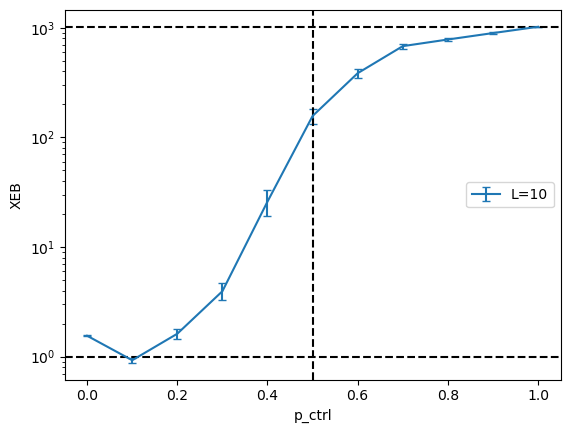

In [234]:
fig,ax=plt.subplots()
mean_XEB = np.nanmean(XEB_map,axis=1)[:,-1]
sem_XEB = np.nanstd(XEB_map,axis=1)[:,-1]/np.sqrt(np.sum(~np.isnan(XEB_map),axis=1)[:,-1])
ax.errorbar(p_ctrl_list,mean_XEB,sem_XEB,capsize=3,label='L=10')
# ax.plot(np.linspace(0,1,21),XEB_data[1],'.-',label='L=10 (Mid-circuit)')
ax.set_yscale('log')
ax.axhline(y=1, color='k',linestyle='--')
ax.axhline(y=2**L, color='k',linestyle='--')
ax.axvline(x=0.5, color='k',linestyle='--')
ax.set_xlabel('p_ctrl')
ax.set_ylabel('XEB')
ax.legend()

Text(0, 0.5, 'XEB')

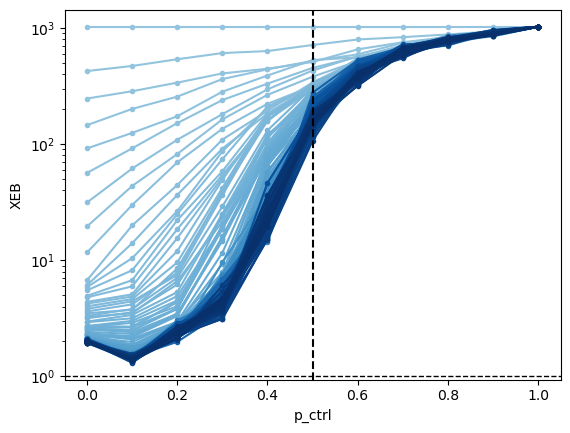

In [212]:
fig,ax=plt.subplots()
color_list = plt.cm.Blues(np.linspace(0.4,1,(2*L**2+1)))
for t_idx in range(2*L**2+1):
    ax.plot(p_ctrl_list,np.nanmean(XEB_map,axis=1)[:,t_idx],'.-',label=f't_idx={t_idx}',color=color_list[t_idx])
# ax.plot(p_ctrl_list,np.nanmean(XEB_map,axis=1)[:,-1],'.-',label='L=10')
ax.set_yscale('log')
ax.axhline(y=1, color='k',linestyle='--',lw=1)
# ax.axhline(y=2**L, color='k',linestyle='--',lw=1)
ax.axvline(x=0.5, color='k',linestyle='--')
ax.set_xlabel('p_ctrl')
ax.set_ylabel('XEB')
# ax.legend()

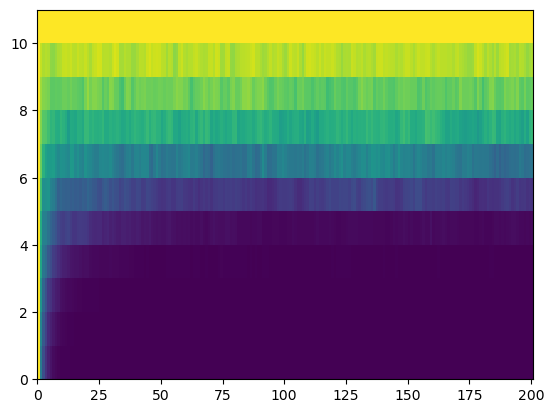

In [206]:
plt.pcolormesh(np.nanmean(XEB_map,axis=1))


In [158]:
from tqdm import tqdm

In [214]:
XEB_data = np.array([[9.89112082e-01, 1.30050881e+00, 1.73815720e+00, 2.46674893e+00,
        3.56272554e+00, 5.24750134e+00, 7.79047257e+00, 1.25466372e+01,
        2.09636832e+01, 3.70504731e+01, 6.09071055e+01, 8.81345645e+01,
        1.18381586e+02, 1.43604078e+02, 1.64772468e+02, 1.84304878e+02,
        2.01886063e+02, 2.14657431e+02, 2.29462070e+02, 2.41785766e+02,
        2.55000023e+02],
       [9.98787487e-01, 1.36760343e+00, 1.88563503e+00, 2.66050289e+00,
        4.04674226e+00, 6.24202313e+00, 1.12423430e+01, 2.20387773e+01,
        4.46565667e+01, 9.79506869e+01, 1.98125428e+02, 3.34333683e+02,
        4.59669024e+02, 5.80178616e+02, 6.72454423e+02, 7.43080743e+02,
        7.99913600e+02, 8.55890553e+02, 9.16299764e+02, 9.78383926e+02,
        1.02300010e+03],
       [9.98739902e-01, 1.39589623e+00, 2.09683309e+00, 3.14765974e+00,
        5.13563239e+00, 8.50038423e+00, 1.67993929e+01, 3.44255305e+01,
        9.16622341e+01, 2.56977132e+02, 6.40039551e+02, 1.23442783e+03,
        1.79702648e+03, 2.26038315e+03, 2.60691378e+03, 2.92292630e+03,
        3.20348966e+03, 3.45677533e+03, 3.67909961e+03, 3.91784195e+03,
        4.09500038e+03],
       [9.99800028e-01, 1.47390924e+00, 2.22394617e+00, 3.68047795e+00,
        6.72803639e+00, 1.25267465e+01, 2.42837443e+01, 5.83971571e+01,
        1.73666878e+02, 6.84356223e+02, 2.27559706e+03, 5.05489341e+03,
        7.45504791e+03, 9.31312966e+03, 1.07898566e+04, 1.18736783e+04,
        1.29265682e+04, 1.39495339e+04, 1.49013930e+04, 1.56679884e+04,
        1.63830015e+04]])

(array([ 82.,  86., 102., 114.,  87., 114.,  97., 119., 106.,  93.]),
 array([   0. ,  102.2,  204.4,  306.6,  408.8,  511. ,  613.2,  715.4,
         817.6,  919.8, 1022. ]),
 <BarContainer object of 10 artists>)

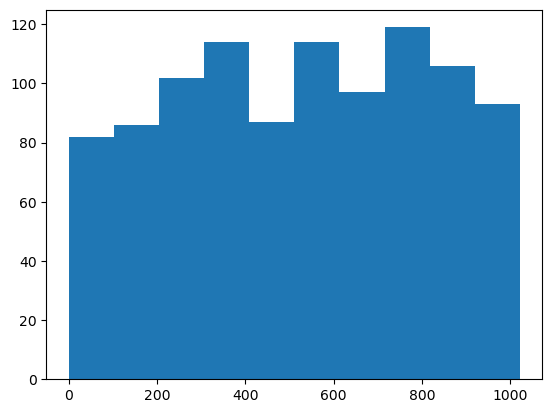

In [123]:
plt.hist(shots[:,-1])

In [ ]:
for 

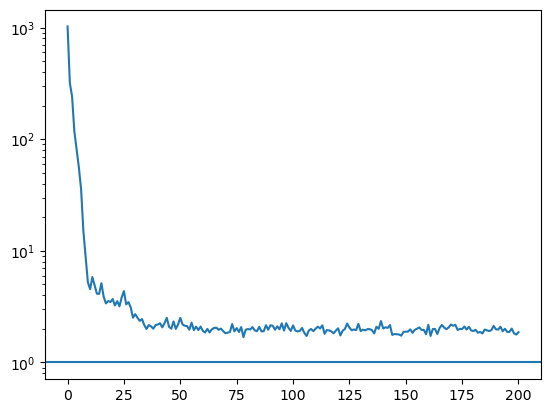

In [128]:
plt.plot([(XEB_single(t_idx)) for t_idx in range(shots.shape[1])])
plt.yscale('log')
plt.axhline(y=1)

In [51]:
unq_vals

array([[   1,    4,    9, ..., 1012, 1021, 1022],
       [   1,  786,  704, ...,  296,  627,  339],
       [   1,  464,   15, ...,  268,   59,  250],
       ...,
       [   1,  534,  965, ...,  216,  838,  593],
       [   1,  198,  806, ...,  475,  137, 1017],
       [   1,  162,  410, ...,   87,    4,  346]])

In [74]:
z = np.array([
    [1, 2, 2, 3, 3, 3],
    [4, 4, 5, 5, 5, 6]
])

In [78]:
unique_values, counts = np.unique(z, return_counts=True, axis=1)


In [79]:
unique_values

array([[1, 2, 2, 3, 3],
       [4, 4, 5, 5, 6]])

In [81]:
counts

array([1, 1, 1, 2, 1])

In [33]:
df_MPS_0_T

observations
Metrics sm  sC p_ctrl L  p_proj                                                   
O       0   0  0.0    10 0.0     [1, 513, 256, 769, 513, 481, 352, 888, 381, 48...
        1   0  0.0    10 0.0     [1, 513, 257, 0, 321, 288, 417, 496, 441, 312,...
        2   0  0.0    10 0.0     [1, 0, 256, 385, 449, 32, 672, 481, 636, 416, ...
        3   0  0.0    10 0.0     [1, 0, 256, 385, 449, 385, 272, 960, 196, 308,...
        4   0  0.0    10 0.0     [1, 0, 257, 128, 449, 961, 1008, 425, 977, 964...
...                                                                            ...
        995 1  1.0    10 0.0     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
        996 1  1.0    10 0.0     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
        997 1  1.0    10 0.0     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
        998 1  1.0    10 0.0     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
        999 1  1.0    10 0.0     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

[20000 rows x 1 columns]